# **London Housing Prices - Exploratory Data Analysis**

London Datastore provides sales data for housing in London and England.
 
In this script, we'll have a closer look at the data.


Data provided by [London Datastore](https://data.london.gov.uk/). 
[License](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/) terms apply.

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [143]:
# - load data -
data_url = 'https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK_House_price_index.xlsx'

df_by_type = pd.read_excel(data_url, sheet_name = 'By type', header = 3)
df_average_price = pd.read_excel(data_url, sheet_name = 'Average price',
                                 usecols = "A:AH, AJ, AK, AM:AU, AW")
df_sales_volume = pd.read_excel(data_url, sheet_name = 'Sales Volume',
                                usecols = "A:AH, AJ, AK, AM:AU, AW")

There are three datasets of interest: 

1) Average property price per region and month

2) Property prices per type, region and month

3) Sales volume per region and month 

We'll explore each in turn.



---


## 1) Average Property Price


First, we'll clean up the data.

In [144]:
# - clean data - 

# drop empty row
df_average_price = df_average_price.drop(df_average_price.index[0])
# format date column and make it index
df_average_price.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
df_average_price.Date = pd.to_datetime(df_average_price.Date)
df_average_price = df_average_price.set_index('Date')
# check for missing values
df_average_price. isnull().values.any()
# express in thousands
df_average_price = df_average_price.div(1000)
# standardise string formatting
for key in df_average_price:
  if key.isupper():
    newkey = key[0] + key[1:].lower()
    if ' ' in key:
      for s in range(0,len(newkey)):
        if newkey[s].isspace():
          newkey = newkey[0:s+1] + newkey[s+1].upper() + newkey[s+2:]
    df_average_price = df_average_price.rename(columns={key: newkey})

rows, columns = df_average_price.shape
df_average_price.head()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Inner London,Outer London,North East,North West,Yorks & The Humber,East Midlands,West Midlands,East Of England,London,South East,South West,England
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995-01-01,91.449,50.4602,93.2845,64.9581,71.3066,81.6715,120.933,69.1582,79.8859,72.5147,62.3001,61.2965,124.903,76.2876,84.7695,68.0001,73.8348,72.2317,92.5165,182.695,80.8758,67.771,60.4913,82.0706,53.5393,72.1896,109.326,67.8852,71.537,59.8652,61.3194,88.559,133.025,78.252,72.9588,42.0764,43.9585,44.8034,45.5445,48.5275,56.7016,74.4358,64.0189,54.7052,53.2028
1995-02-01,82.2028,51.0858,93.1902,64.7879,72.0223,81.6576,119.509,68.9511,80.8971,73.1552,60.9933,63.1871,122.088,78.9012,83.3961,69.3935,75.0311,71.0516,94.3424,182.345,81.2301,65.3815,60.8693,79.9827,53.1539,72.1416,111.103,64.7991,70.8932,62.3185,60.2521,88.641,131.468,75.8857,72.9379,42.572,43.9254,44.5288,46.0516,49.3413,56.5936,72.7779,63.715,54.3561,53.0962
1995-03-01,79.1207,51.269,92.2475,64.3675,72.0158,81.4493,120.282,68.7124,81.3799,72.1904,61.3778,63.5933,120.636,78.5219,83.4162,69.368,74.1887,72.098,93.4659,182.879,81.1115,66.3365,60.288,80.6617,53.4583,72.5014,107.325,65.7633,70.3068,63.9387,60.8711,87.1248,132.26,76.5916,72.7145,42.3697,44.4349,45.2005,45.3838,49.4422,56.1712,73.8968,64.1136,53.5831,53.2013
1995-04-01,77.1012,53.1335,90.7629,64.2777,72.9656,81.1244,120.098,68.61,82.1889,71.4429,61.9277,65.1396,121.425,79.5456,83.5679,69.4443,73.9114,71.8903,93.3445,184.177,81.6728,66.3888,59.471,79.9905,54.4798,72.2286,106.875,63.0736,69.4119,66.2332,60.9714,87.026,133.37,76.8516,72.5919,42.0958,44.2678,45.6143,46.1242,49.4559,56.5679,74.4553,64.6232,54.786,53.5909
1995-05-01,84.4091,53.0422,90.258,63.9971,73.704,81.5426,119.929,68.8449,82.0771,70.6308,63.513,66.194,124.434,79.374,83.8537,68.5345,73.1171,72.8775,94.3464,191.474,82.1235,69.0351,58.5514,80.874,55.804,72.3666,107.708,64.4205,69.7592,66.4329,61.4942,86.5181,133.911,79.1292,72.753,43.2665,44.2236,44.831,45.878,50.3697,56.4798,75.432,64.5304,54.6988,53.6782


The data contains average house prices per London borough and English region, per month.

Let's plot the latest average prices per area.

In [145]:
# - edit dataframe - 

# split into meaningful categories
ldn_summary = ['Inner London','Outer London']
engl_regions =['North East','North West', 'Yorks & The Humber',
               'East Midlands','West Midlands','East Of England',
               'London','South East','South West']
#london boroughs
df_ldn = df_average_price
df_ldn = df_ldn.drop(columns=ldn_summary)
df_ldn = df_ldn.drop(columns=engl_regions)
df_ldn = df_ldn.drop(columns='England')

#england
df_engl = df_average_price[engl_regions]
df_engl = df_engl.drop(columns='London')

-- Latest Average House Prices: December2020 --
Least expensive English region: North East at GBP 141k
Most expensive English region: South East at GBP 341k
 
Least expensive London borough: Barking & Dagenham at GBP 318k
Most expensive London borough: Kensington & Chelsea at GBP 1289k
 


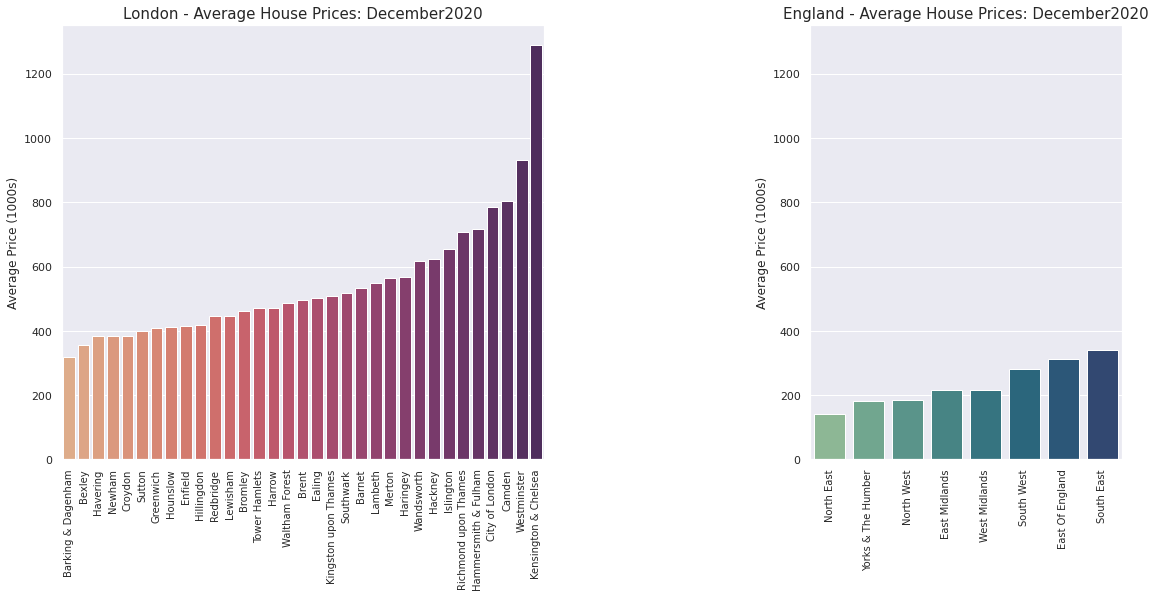

In [146]:
# -  plot latest house prices - 

sns.set(rc={'figure.figsize':(19,8)})
plt.subplot(1, 2, 1)
to_plot = df_ldn.drop(df_average_price.index[0:rows-1])
to_plot = to_plot.sort_values(by = to_plot.index[0], axis = 1) 
b = sns.barplot(data=to_plot,palette='flare')
yl = b.get_ylim();
b.set_xticklabels(b.get_xticklabels(),
                  fontdict={'fontsize': 10}, rotation=90)

b.set_ylabel('Average Price (1000s)')
b.set_title('London - Average House Prices: '+ 
            df_average_price.index[-1].month_name() +
            str(df_average_price.index[-1].year),  fontdict={'fontsize': 15})
plt.subplot(1, 3, 3)
to_plot = df_engl.drop(df_average_price.index[0:rows-1])
to_plot = to_plot.sort_values(by = to_plot.index[0], axis = 1) 
b = sns.barplot(data=to_plot, palette='crest')
b.set_ylim(yl)
b.set_xticklabels(b.get_xticklabels(),
                  fontdict={'fontsize': 10}, rotation=90)
b.set_ylabel('Average Price (1000s)')
b.set_title('England - Average House Prices: '+ 
            df_average_price.index[-1].month_name() +
            str(df_average_price.index[-1].year),  fontdict={'fontsize': 15})

# print some descriptives:
print('-- Latest Average House Prices: '+
      df_average_price.index[-1].month_name() +
      str(df_average_price.index[-1].year)+' --')
engl_desc = df_engl.drop(df_engl.index[0:rows-1])
engl_desc = engl_desc.sort_values(by = engl_desc.index[0], axis = 1) 
print('Least expensive English region: ' + engl_desc.columns[0] + ' at GBP ' + 
      str(int(np.round(engl_desc.iloc[0,0])))+'k')
print('Most expensive English region: ' + engl_desc.columns[-1] + ' at GBP ' + 
      str(int(np.round(engl_desc.iloc[0,-1])))+'k')

print(' ')
ldn_desc = df_ldn.drop(df_ldn.index[0:rows-1])
ldn_desc = ldn_desc.sort_values(by = ldn_desc.index[0], axis = 1) 
print('Least expensive London borough: ' + ldn_desc.columns[0] + ' at GBP ' + 
      str(int(np.round(ldn_desc.iloc[0,0])))+'k')
print('Most expensive London borough: ' + ldn_desc.columns[-1] + ' at GBP ' + 
      str(int(np.round(ldn_desc.iloc[0,-1])))+'k')
print(' ')

We can see that, according to the latest data, London property prices are far higher than property prices in any other region of England. There is however, a large amount of variability between London boroughs.

Next, we'll plot how these prices develop over time.

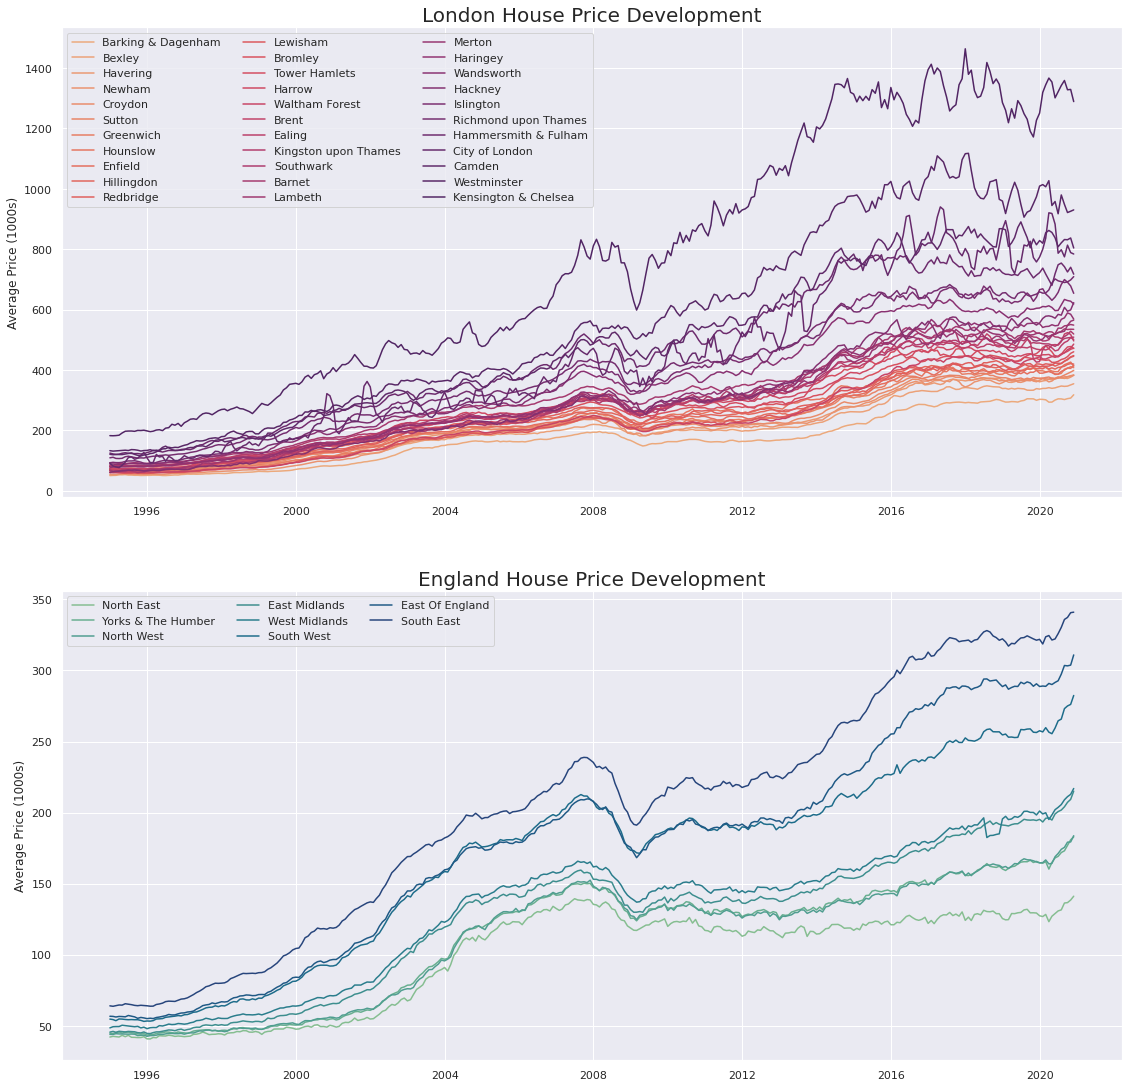

In [147]:
# - plot prices over time - 

sns.set(rc={'figure.figsize':(19,19)})
sns.set()
#London
plt.subplot(2,1,1)
my_cmap = sns.color_palette('flare', n_colors = len(list(df_ldn)))
df_ldn = df_ldn.sort_values(by = df_ldn.index[-1], axis = 1) 
count=0
for region in df_ldn:
  plt.plot(df_ldn[region], color = my_cmap[count])
  count += 1
plt.legend(list(df_ldn),loc=2,ncol=3)
plt.title('London House Price Development',fontsize= 20)
plt.ylabel('Average Price (1000s)')

#England
plt.subplot(2,1,2)
my_cmap = sns.color_palette('crest', n_colors = len(list(df_engl)))
df_engl = df_engl.sort_values(by = df_engl.index[-1], axis = 1) 
count=0
for region in df_engl:
  plt.plot(df_engl[region], color = my_cmap[count])
  count += 1
plt.legend(list(df_engl),loc=2,ncol=3)
plt.title('England House Price Development',fontsize= 20)
plt.ylabel('Average Price (1000s)')

#keep for correlation
df_ldn_price = df_ldn.copy()
df_engl_price = df_engl.copy()

We see a price increase over time in all regions listed. One noticable pattern is the clear drop in prices following 2008.

The overall rate of this growth seems to vary across regions, so let's quantify that.

In [148]:
# - print growth rates - 

#London
latest_yr = df_ldn.index.year.max()
earliest_yr = df_ldn.index.year.min()
latest_avg = df_ldn[df_ldn.index.year==latest_yr].mean().mean()
earliest_avg = df_ldn[df_ldn.index.year==earliest_yr].mean().mean()
print('-- Growth rates -- ')
print('House prices in London boroughs have increased by an average of ' + 
      str(round(latest_avg-earliest_avg)) +'k over ' + 
      str(latest_yr-earliest_yr) + ' years ('+ str(earliest_yr) +
      '-'+ str(latest_yr) +')')
# Slope
slope_dict = {}
for region in df_ldn:
  x = np.arange(0,len(df_ldn[region]), dtype='float')
  y = np.array(df_ldn[region].array, dtype='float')
  slope = np.polyfit(x,y,1)[0]
  slope_dict.update({region: slope})
df_slope = pd.DataFrame(columns=df_ldn.columns)
df_slope = df_slope.append(slope_dict, ignore_index=True)
print('Highest growth rate was seen in ' +
      df_slope.columns[np.argmax(np.max(df_slope))])
print('Lowest growth rate was seen in '  +
      df_slope.columns[np.argmin(np.min(df_slope))])

#England
latest_yr = df_engl.index.year.max()
earliest_yr = df_engl.index.year.min()
latest_avg = df_engl[df_engl.index.year==latest_yr].mean().mean()
earliest_avg = df_engl[df_engl.index.year==earliest_yr].mean().mean()
print(' ')
print('House prices in England have increased by an average of ' + 
      str(round(latest_avg-earliest_avg)) +'k over ' + 
      str(latest_yr-earliest_yr) + ' years ('+ str(earliest_yr) +
      '-'+ str(latest_yr) +')')
# Slope
slope_dict = {}
for region in df_engl:
  x = np.arange(0,len(df_engl[region]), dtype='float')
  y = np.array(df_engl[region].array, dtype='float')
  slope = np.polyfit(x,y,1)[0]
  slope_dict.update({region: slope})
df_slope = pd.DataFrame(columns=df_engl.columns)
df_slope = df_slope.append(slope_dict, ignore_index=True)
print('Highest growth rate was seen in ' +
      df_slope.columns[np.argmax(np.max(df_slope))])
print('Lowest growth rate was seen in '  +
      df_slope.columns[np.argmin(np.min(df_slope))])

-- Growth rates -- 
House prices in London boroughs have increased by an average of 455k over 25 years (1995-2020)
Highest growth rate was seen in Kensington & Chelsea
Lowest growth rate was seen in Barking & Dagenham
 
House prices in England have increased by an average of 171k over 25 years (1995-2020)
Highest growth rate was seen in South East
Lowest growth rate was seen in North East


The most expensive London borough, Kensington and Chelsea, has also experienced the fastest price increase.
Considering other English regions, house prices have increased the most in the South East. This could be related to the location of London in this area.

---

## 2) Property Prices by Type





We'll now look at the dataframe containing data on house prices by type.

First, let's clean the dataframe.

In [149]:
# - Clean dataframe - 

df_by_type = df_by_type.drop( ['Detached.1','Semi Detached.1','Terraced.1',
                               'Flat.1','Detached.3','Semi Detached.3',
                               'Terraced.3','Flat.3'],axis=1)
df_by_type = df_by_type.rename(columns = {'Detached':'Detached LDN',
                                          'Detached.2':'Detached UK',
                                          'Semi Detached':'Semi Detached LDN',
                                          'Semi Detached.2':'Semi Detached UK',
                                          'Terraced' :'Terraced LDN',
                                          'Terraced.2' :'Terraced UK',
                                          'Flat':'Flat LDN',
                                          'Flat.2':'Flat UK'})
# create date series
for row in range(0,len(df_by_type)):
  if np.isnan(df_by_type['Unnamed: 0'][row]):
    df_by_type.loc[row,'Unnamed: 0'] = df_by_type.loc[row-1,'Unnamed: 0']
  join = df_by_type.loc[row,'Unnamed: 1']
  join = join +  '-' + str(int(df_by_type.loc[row,'Unnamed: 0']))
  df_by_type.loc[row,'Unnamed: 1'] = join

df_by_type['Unnamed: 1'] = pd.to_datetime(df_by_type['Unnamed: 1'])
df_by_type.rename(columns = {'Unnamed: 1':'Date'}, inplace = True)
df_by_type = df_by_type.drop(['Unnamed: 0'], axis = 1)
df_by_type = df_by_type.set_index('Date')
# replace empty cells with nan
df_by_type = df_by_type.replace('-', np.nan, regex=True)
#express in k
df_by_type = df_by_type.div(1000, fill_value=None)
df_by_type.head()

,Detached LDN,Semi Detached LDN,Terraced LDN,Flat LDN,Detached UK,Semi Detached UK,Terraced UK,Flat UK
Date,,,,,,,,
1995-01-01,161.449305,95.897529,73.705966,64.618572,NaN,NaN,NaN,NaN
1995-02-01,157.449439,96.084273,73.756540,60.358672,NaN,NaN,NaN,NaN
1995-03-01,156.089829,94.980819,73.571216,64.185604,NaN,NaN,NaN,NaN
1995-04-01,156.932137,95.192551,73.989769,65.098795,NaN,NaN,NaN,NaN
1995-05-01,158.778427,96.726668,75.063482,65.717662,NaN,NaN,NaN,NaN


This dataframe contains house prices per type (detached, demi detached, terraced, flat), region (London/England), and month. Note that English values are missing for earlier years.

Again, we'll first plot the latest prices per property type.

Text(0.5, 1.0, 'England - Average House Prices: December2020')

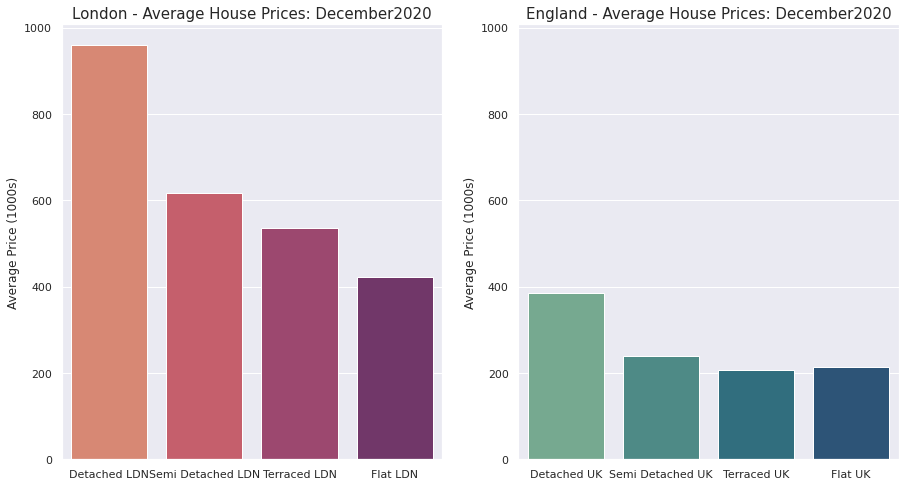

In [150]:
# - plot price by type - 

sns.set(rc={'figure.figsize':(15,8)})
plt.subplot(1, 2, 1)
to_plot = df_by_type[['Detached LDN','Semi Detached LDN',
                      'Terraced LDN','Flat LDN']]
to_plot = to_plot.drop(to_plot.index[0:rows-1])
b = sns.barplot(data=to_plot,palette='flare')
yl = b.get_ylim()
b.set_ylabel('Average Price (1000s)')
b.set_title('London - Average House Prices: '+ 
            df_by_type.index[-1].month_name() +
            str(df_by_type.index[-1].year),  fontdict={'fontsize': 15})


plt.subplot(1, 2, 2)
to_plot = df_by_type[['Detached UK','Semi Detached UK','Terraced UK','Flat UK']]
to_plot = to_plot.drop(to_plot.index[0:rows-1])
b = sns.barplot(data=to_plot,palette='crest')
b.set_ylim(yl)
b.set_ylabel('Average Price (1000s)')
b.set_title('England - Average House Prices: '+ 
            df_by_type.index[-1].month_name() +
            str(df_by_type.index[-1].year),  fontdict={'fontsize': 15})

We can see that detached houses are by far the most expensive purchases in both London and other English regions. An interesting difference between London and England, besides the overall scale, is the value of flats. In London, flats are the least expensive property type while in the rest of England, flats are more expensive than terraced houses.

Next, we'll plot the development of these prices over time.

Text(0, 0.5, 'Average Price (1000s)')

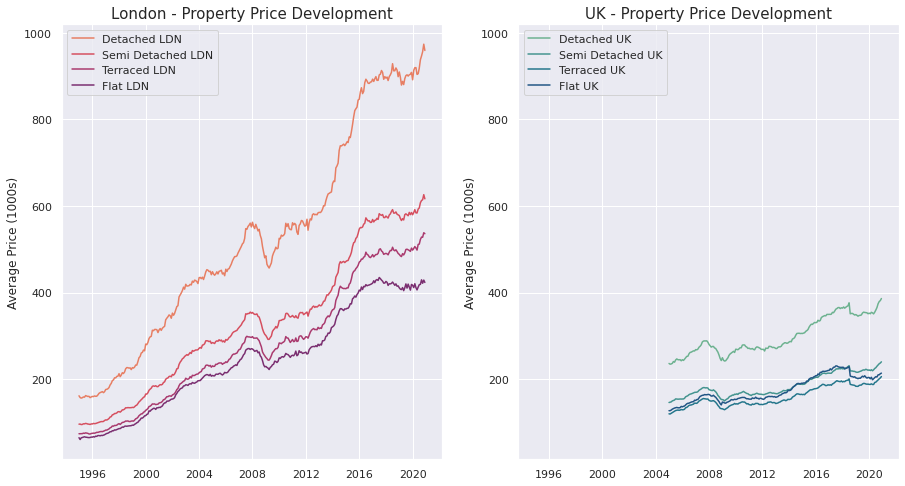

In [151]:
#- plot price by type over time - 

sns.set(rc={'figure.figsize':(15,8)})
plt.subplot(1, 2, 1)
to_plot = ['Detached LDN','Semi Detached LDN', 'Terraced LDN','Flat LDN']
my_cmap = sns.color_palette('flare', n_colors = len(list(to_plot)))
for linecount in range(0,len(to_plot)):
  plt.plot(df_by_type[to_plot[linecount]], color = my_cmap[linecount])
xl = plt.xlim()
yl = plt.ylim()
plt.title('London - Property Price Development',fontsize =15)
plt.legend(to_plot, loc = 'upper left')
plt.ylabel('Average Price (1000s)')

plt.subplot(1, 2, 2)
to_plot = ['Detached UK','Semi Detached UK','Terraced UK','Flat UK']
my_cmap = sns.color_palette('crest', n_colors = len(list(to_plot)))
for linecount in range(0,len(to_plot)):
  plt.plot(df_by_type[to_plot[linecount]], color = my_cmap[linecount])
plt.xlim(xl)
plt.ylim(yl)
plt.title('UK - Property Price Development',fontsize =15)
plt.legend(to_plot, loc = 'upper left')
plt.ylabel('Average Price (1000s)')

We can see that the relative value of each property type has remained comparable in London. In the rest of England, while the pattern is similar overall, the price of flats seems variable over time in relation to the other property types.

Again, we see a noticable drop in sales following the year 2008, as well as what looks like a plateau in more recent years.

Note: Data collection for non-London housing prices didn't start until 2005.



---


## 3) Sales Volume

Lasly, we'll look atthe ales volume data.

Let's first clean the dataframe.

In [152]:
# - clean dataframe -

# drop empty row
df_sales_volume = df_sales_volume.drop(df_sales_volume.index[0])
# format date column and make it index
df_sales_volume.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
df_sales_volume.Date = pd.to_datetime(df_sales_volume.Date)
df_sales_volume = df_sales_volume.set_index('Date')
# check for missing values
df_sales_volume. isnull().values.any()
# standardise string formatting
for key in df_sales_volume:
  if key.isupper():
    newkey = key[0] + key[1:].lower()
    if ' ' in key:
      for s in range(0,len(newkey)):
        if newkey[s].isspace():
          newkey = newkey[0:s+1] + newkey[s+1].upper() + newkey[s+2:]
    df_sales_volume = df_sales_volume.rename(columns={key: newkey})

rows, columns = df_sales_volume.shape
df_sales_volume.head()

#london boroughs
df_ldn = df_sales_volume
df_ldn = df_ldn.drop(columns=ldn_summary)
df_ldn = df_ldn.drop(columns=engl_regions)
df_ldn = df_ldn.drop(columns='England')

#england
df_engl = df_sales_volume[engl_regions]

df_ldn.head()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995-01-01,17,96,332,269,233,323,198,375,303,327,182,131,227,226,221,203,202,175,90,324,213,227,211,219,168,268,208,182,218,147,249,403,339
1995-02-01,7,95,327,207,220,326,194,342,242,302,174,115,185,223,175,198,256,145,102,207,185,207,206,204,189,277,212,169,177,149,226,379,251
1995-03-01,14,144,384,318,320,449,207,447,377,437,206,159,265,317,249,282,337,263,140,318,221,315,300,275,294,385,307,270,319,166,276,513,365
1995-04-01,7,109,304,253,249,362,174,377,270,337,176,141,258,244,216,297,255,211,125,293,194,288,227,230,217,317,249,169,268,204,253,451,328
1995-05-01,10,149,393,317,293,428,220,449,345,393,216,138,233,330,244,297,279,233,139,274,229,309,311,269,284,399,289,212,310,186,281,517,317


This dataframe contains numbers of sales per London borough and English region, and month.

As always, we'll first plot the latest numbers per area.

Text(0.5, 1.0, 'England - Sales Volume: October2020')

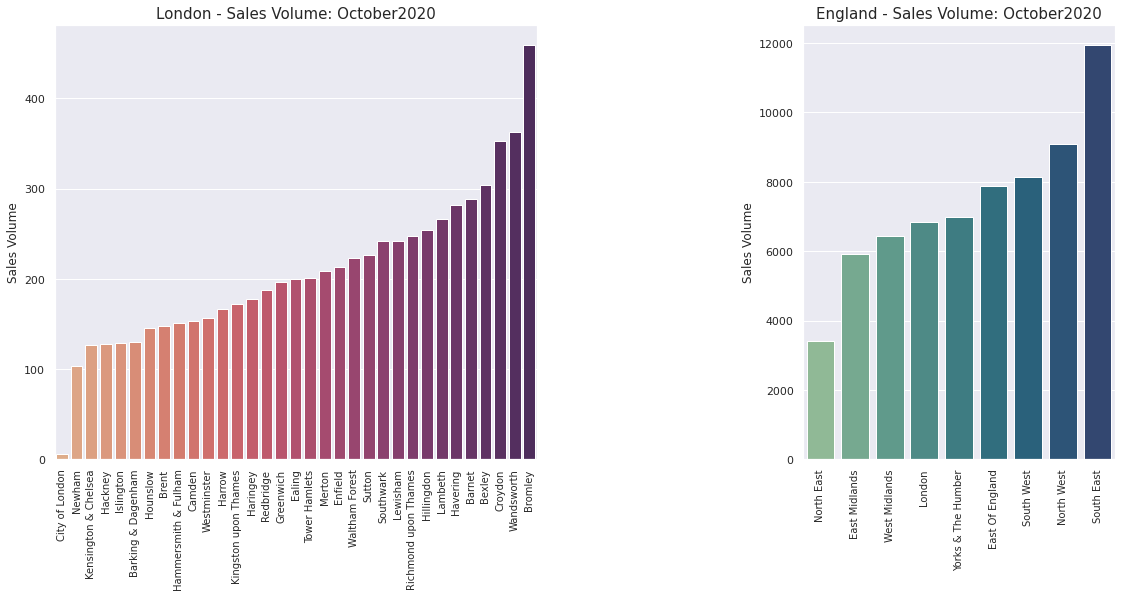

In [153]:
# - plot latest sales volume - 

sns.set(rc={'figure.figsize':(19,8)})
plt.subplot(1, 2, 1)
to_plot = df_ldn.drop(df_sales_volume.index[0:rows-1])
to_plot = to_plot.sort_values(by = to_plot.index[0], axis = 1) 
a = sns.barplot(data=to_plot,palette='flare')

a.set_xticklabels(a.get_xticklabels(),
                  fontdict={'fontsize': 10}, rotation=90)

a.set_ylabel('Sales Volume')
a.set_title('London - Sales Volume: '+ 
            df_sales_volume.index[-1].month_name() +
            str(df_sales_volume.index[-1].year),  fontdict={'fontsize': 15})
plt.subplot(1, 3, 3)
to_plot = df_engl.drop(df_sales_volume.index[0:rows-1])
to_plot = to_plot.sort_values(by = to_plot.index[0], axis = 1) 
b = sns.barplot(data=to_plot, palette='crest')
yl = b.get_ylim()
#to match yaxis: a.set_ylim(yl)
b.set_xticklabels(b.get_xticklabels(),
                  fontdict={'fontsize': 10}, rotation=90)
b.set_ylabel('Sales Volume')
b.set_title('England - Sales Volume: '+ 
            df_sales_volume.index[-1].month_name() +
            str(df_sales_volume.index[-1].year),  fontdict={'fontsize': 15})

Based on visual inspection alone, there are no obvious connections between sales volume and price. Sales volume likely depends on factors like the size and population density of the region of interest.
Note: Here, London and England are not on the same scale (far fewer sales in London).

Next, we'll plot these numbers over time.

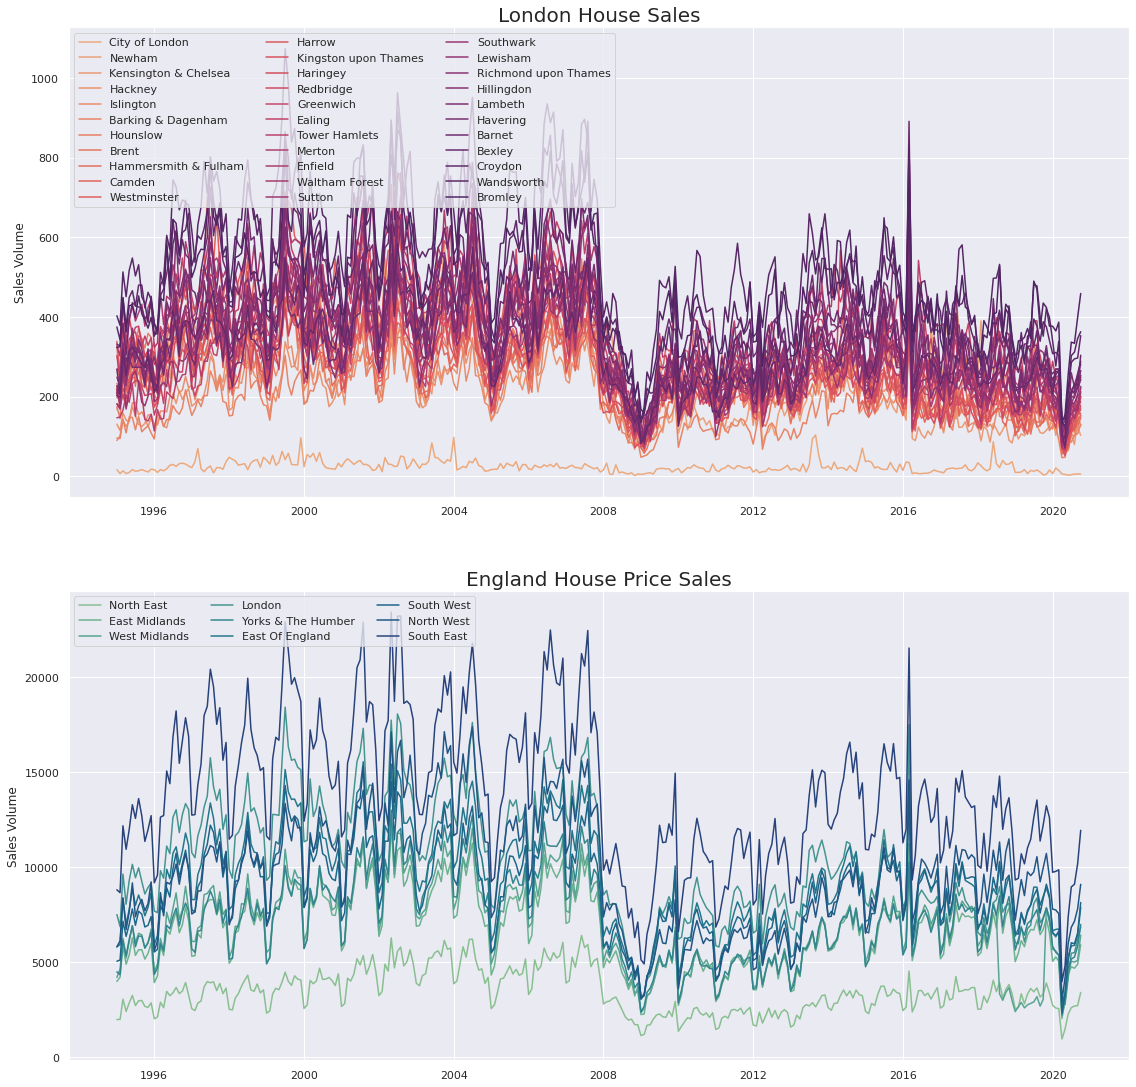

In [154]:
# - Plot sales volume over time - 
sns.set(rc={'figure.figsize':(19,19)})
sns.set()
#London
plt.subplot(2,1,1)
my_cmap = sns.color_palette('flare', n_colors = len(list(df_ldn)))
df_ldn = df_ldn.sort_values(by = df_ldn.index[-1], axis = 1) 
count=0
for region in df_ldn:
  plt.plot(df_ldn[region], color = my_cmap[count])
  count += 1
plt.legend(list(df_ldn),loc=2,ncol=3)
plt.title('London House Sales',fontsize= 20)
plt.ylabel('Sales Volume')

#England
plt.subplot(2,1,2)
my_cmap = sns.color_palette('crest', n_colors = len(list(df_engl)))
df_engl = df_engl.sort_values(by = df_engl.index[-1], axis = 1) 
count=0
for region in df_engl:
  plt.plot(df_engl[region], color = my_cmap[count])
  count += 1
plt.legend(list(df_engl),loc=2,ncol=3)
plt.title('England House Price Sales',fontsize= 20)
plt.ylabel('Sales Volume')

#keep for corr
df_ldn_vol = df_ldn.copy()
df_engl_vol = df_engl.copy()

Two immediately obvious features are 1) a large drop in sales volume following 2008 (likely related to the economic crisis) and ) a spike in sales in 2016 (likely related to Brexit).

High-frequency fluctuations in sales make long-term trends hard to interpret. We'll therefore average the data per year and re-plot this figure. We'll also see if there are any interesting patterns in the high-frequency fluctuations.

Text(0, 0.5, 'Sales Volume')

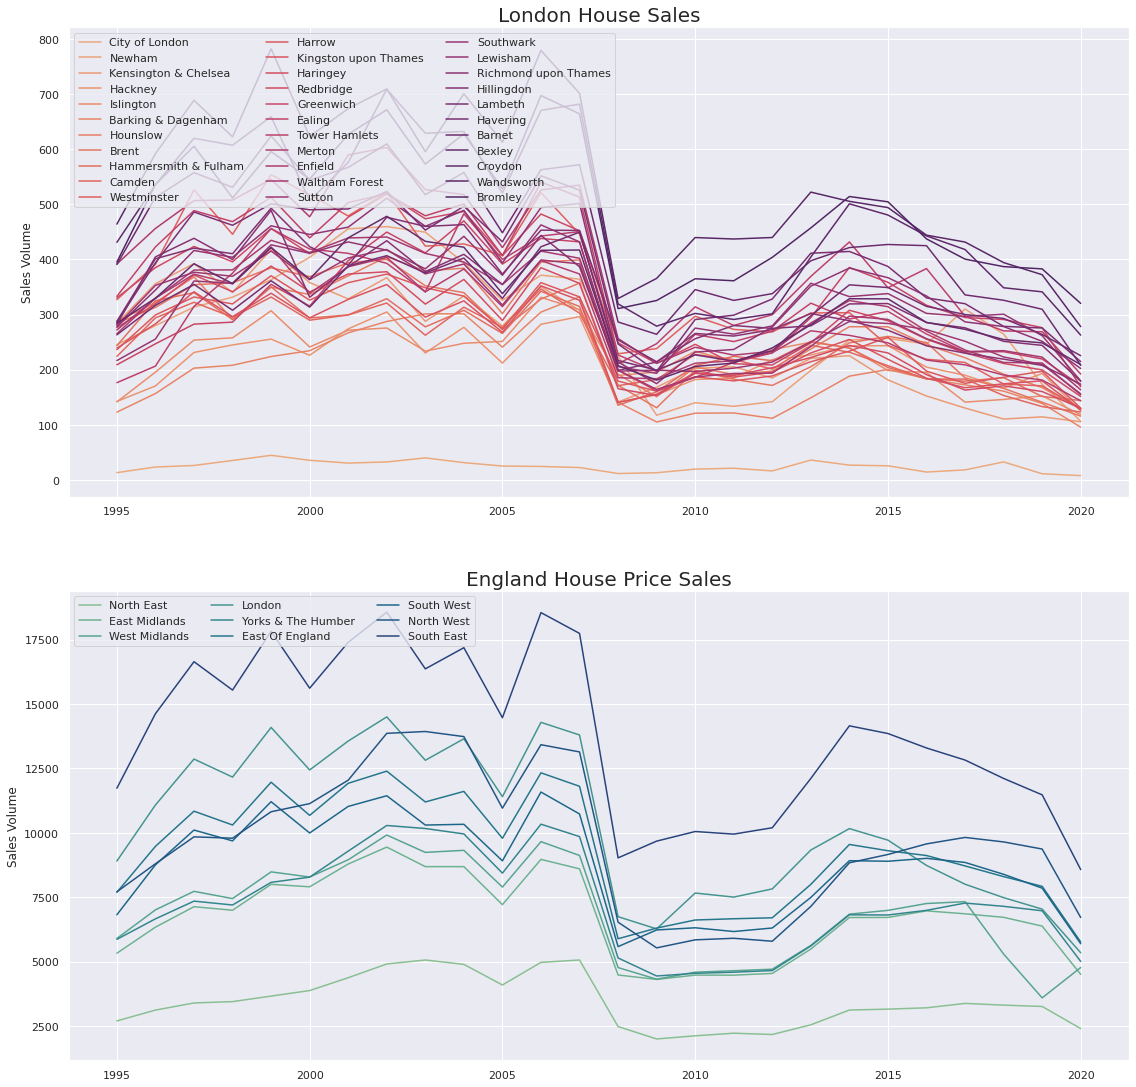

In [155]:
# - mean per year - 
df_ldn_yr = pd.DataFrame(columns=df_ldn.columns)
for yr in range(min(df_ldn.index).year,max(df_ldn.index).year+1):
  add = {};
  add.update({'Year':yr})
  for region in df_ldn:
    sales = df_ldn[region][df_ldn[region].index.year == yr].mean()
    add.update({region:sales})
  df_ldn_yr = df_ldn_yr.append(add,ignore_index=True)
df_ldn_yr = df_ldn_yr.set_index('Year')

df_engl_yr = pd.DataFrame(columns=df_engl.columns)
for yr in range(min(df_engl.index).year,max(df_engl.index).year+1):
  add = {}
  add.update({'Year':yr})
  for region in df_engl:
    sales = df_engl[region][df_engl[region].index.year == yr].mean()
    add.update({region:sales})
  df_engl_yr = df_engl_yr.append(add,ignore_index=True)
df_engl_yr = df_engl_yr.set_index('Year')

#plot   
sns.set(rc={'figure.figsize':(19,19)})
sns.set()
#London
plt.subplot(2,1,1)
my_cmap = sns.color_palette('flare', n_colors = len(list(df_ldn_yr)))
count=0
for region in df_ldn_yr:
  to_plot = df_ldn[region]
  
  plt.plot(df_ldn_yr[region], color = my_cmap[count])
  count += 1
plt.legend(list(df_ldn_yr),loc=2,ncol=3)
plt.title('London House Sales',fontsize= 20)
plt.ylabel('Sales Volume')

#England
plt.subplot(2,1,2)
my_cmap = sns.color_palette('crest', n_colors = len(list(df_engl_yr)))
count=0
for region in df_engl_yr:
  plt.plot(df_engl_yr[region], color = my_cmap[count])
  count += 1
plt.legend(list(df_engl_yr),loc=2,ncol=3)
plt.title('England House Price Sales',fontsize= 20)
plt.ylabel('Sales Volume')

We can see that there is no obvious upward trend on a long-term scale. In fact, we can see a large drop in sales volume followed the year 2008, as well as a much slower decline in recent years.

Let's next explore whether there are any rhythmic patterns over months or years.



Turning points in the London housing market sales volume:
Sales volume peaks occur on average every 2.83 years
Peak years: 
[1997, 1999, 2002, 2004, 2006, 2010, 2014]
Trough years: 
[1998, 2000, 2003, 2005, 2009, 2011]
 


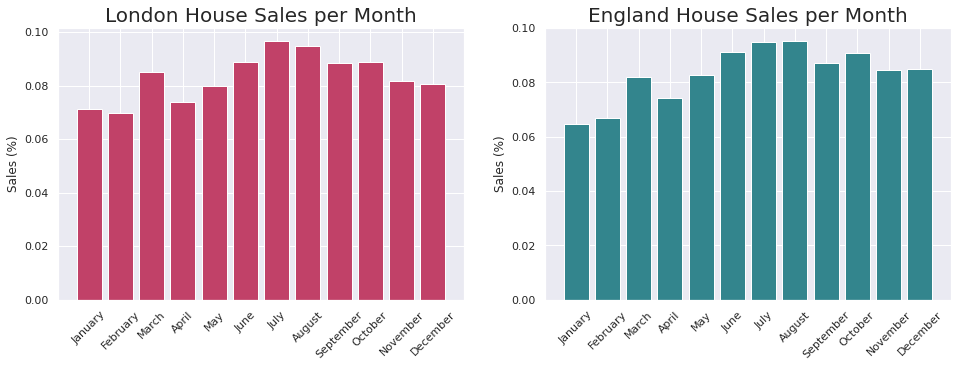

In [156]:
# - high frequency sales fluctuations: sale per month - 

def count_months(df):
  # collect sales percentage per month
  month_dict = {'January':0,'February':0,'March':0,'April':0,'May':0,'June':0,
              'July':0,'August':0,'September':0,'October':0,'November':0,
              'December':0}
  for yr in range(df.index.year.min(),df.index.year.max()+1):
    total = sum(df[df.index.year == yr])
    perc = df[df.index.year == yr]/total
    for m in range(0,len(perc)):
      month = perc.index.month_name()[m]
      month_dict[month] = month_dict[month] + perc[m]

  month_dict = {entry : value/(df.index.year.max()+1-df.index.year.min()) 
                for entry,value in month_dict.items()}
  return month_dict

# London
df = df_ldn.copy()
df = df.sum(axis = 1)
ldn_months = count_months(df)
#plot
sns.set(rc={'figure.figsize':(16,5)})
plt.subplot(1, 2, 1)
ldn_col = sns.color_palette('flare', n_colors = 1)
plt.bar(ldn_months.keys(),ldn_months.values(),color=ldn_col)
plt.title('London House Sales per Month',fontsize= 20)
plt.ylabel('Sales (%)')
plt.xticks(rotation = 45)

# England
df = df_engl.copy()
df = df.sum(axis = 1)
engl_months = count_months(df)
#plot
plt.subplot(1, 2, 2)
engl_col = sns.color_palette('crest', n_colors = 1)
plt.bar(engl_months.keys(),engl_months.values(),color=engl_col)
plt.title('England House Sales per Month',fontsize= 20)
plt.ylabel('Sales (%)')
plt.xticks(rotation = 45)


# - high frequency sales fluctuations: sale per year - 
#sum over regions
df_ldn_yr = df_ldn_yr.sum(axis = 1)
# find peaks/troughs
slope = np.empty(df_ldn.index.year.max()+1-df_ldn.index.year.min())
slope.fill(np.nan)
trough = []
peak = []
for yr in range(df_ldn.index.year.min()+1,df_ldn.index.year.max()+1):
  x = np.array([float(yr-1), float(yr)], dtype='float')
  y = np.array([df_ldn_yr[yr-1],df_ldn_yr[yr]], dtype='float')
  slope[yr-df_ldn.index.year.min()] = np.polyfit(x,y,1)[0]
  if yr-df_ldn.index.year.min() > 1:
    if slope[yr-df_ldn.index.year.min()] >0:
      if slope[yr-df_ldn.index.year.min()-1] < 0:
        trough.append(yr-1)
    if slope[yr-df_ldn.index.year.min()] < 0:
      if slope[yr-df_ldn.index.year.min()-1] > 0:
        peak.append(yr-1)
#print peaks/troughs
peak_int = np.mean([peak[step+1]-peak[step] for step in range(0,len(peak)-1)])
print('Turning points in the London housing market sales volume:')
print('Sales volume peaks occur on average every '+
      str(round(peak_int,2)) + ' years')
print('Peak years: ')
print(peak)
print('Trough years: ')
print(trough)
print(' ')

There number of sales in London seems to fluctuate, peaking every 3 years.
While more properties are bought in the summer months, the sales volume difference between months is small.

Lastly, we'll look at the relationship between sales volume and house prices in London.

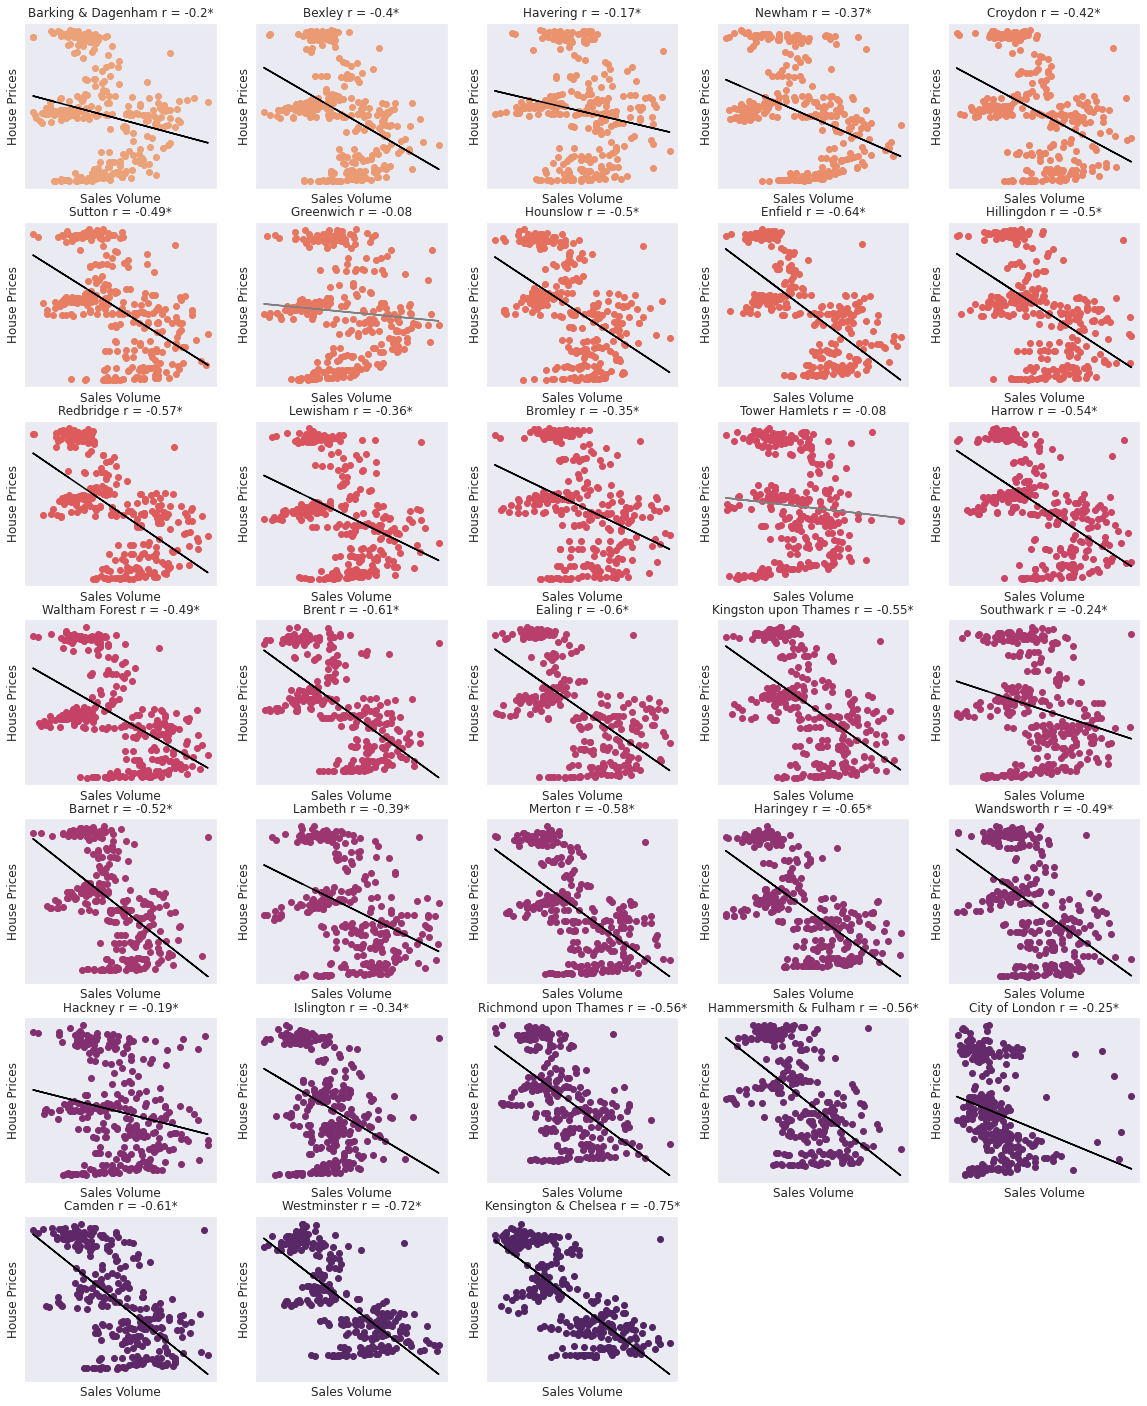

In [223]:
# - corr: sales-prices - 
delete =[df_ldn_price.index[310],df_ldn_price.index[311]]]
df_ldn_price = df_ldn_price.drop(delete)
if df_ldn_price.shape == df_ldn_vol.shape:
  sns.set(rc={'figure.figsize':(20,25)})
  count = 0
  for region in df_ldn_price:
    count += 1
    plt.subplot(7,5,count)
    my_cmap = sns.color_palette('flare', n_colors = len(list(df_ldn_price))+1)
    plt.scatter(df_ldn_vol[region],df_ldn_price[region],color=my_cmap[count])
    plt.xlabel('Sales Volume')
    plt.ylabel('House Prices')
    corr, p = pearsonr(df_ldn_vol[region], df_ldn_price[region])
    trendcolor = [.5, .5, .5]
    pstr = ''
    if p < .05:
      trendcolor = [0, 0, 0]
      pstr='*'
    plt.title(region + ' r = ' + str(round(corr,2))+pstr)
    trend = np.polyfit(np.array(df_ldn_vol[region], dtype='float'),
                      np.array(df_ldn_price[region], dtype='float'),1)
    trendpoly = np.poly1d(trend) 
    plt.plot(df_ldn_vol[region],trendpoly(df_ldn_vol[region]),color=trendcolor)
    plt.xticks([])
    plt.yticks([])

Overall, there appears to be  negative relationship between house prices and sales volume.



---

# Summary

Now that we've had a look at the data, here are our main findings:

- London house prices far exceed house prices in any other English region
- While London is expensive overall, there is a lot of variability across boroughs
- The most expensive borough by far is Kensington & Chelsea, which also experienced the most growth over recent years
- Following the year 2008, both house prices and the number of sales decreased rapidly. This may be related to the economic crisis of 2008.
- Prices and sales volume also changed following the year 2016, with an initial spike in sales and a more subtle, slow decline in sales and prices since then. This may be related to Brexit.


Next, we'll look at which factors predict London house prices per borough.


---







